In [1]:
import json
import re
import matplotlib.pyplot as mp
import math

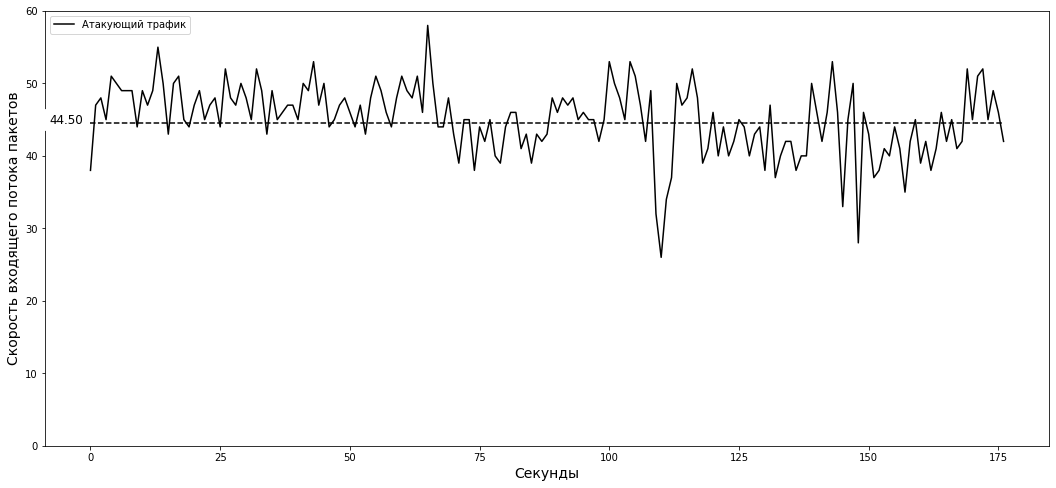

In [2]:
# 1 of 50 packets

def average(lst):
    summ = 0
    count = 0
    for i in lst:
        if i > 10:
            summ += i
            count += 1
    return summ/count


def std_deviation(lst):
    summ = 0
    count = 0
    aver = average(lst)
    for i in lst:
        if i > 10:
            summ += (i - aver) ** 2
            count += 1
    return (summ/count) ** 0.5 
            
with open('sflowdata_50_5.json','r') as file:
    st = file.read()
    time = []
    all_packets = []
    my_packets = []
    other_packets = []
    
    old_time, new_time = None, None
    
    while st != '':
        try:
            json.loads(st)
        except ValueError as err:
            err_st = err.args[0]
            sym = int(re.findall(r"\(char (.*)\)", err_st)[0])
            one_json = st[:sym-2]
            st = st[sym:]
            datagram = json.loads(one_json)

            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                else:
                    time_counter = 0
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
        else:
            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                time_counter += 1
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                #print(i['elements'][0])
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
            st = ''        
    
    time.append(time_counter)
    all_packets.append(all_counter)
    my_packets.append(my_counter)
    other_packets.append(all_counter - my_counter)
    
    all_average = [average(all_packets) for _ in time]
    my_average = [average(my_packets) for _ in time]
    
    mp.figure(figsize=(18, 8)) #18 10
    font = {"size": 14}
    mp.xlabel('Секунды', **font)
    mp.ylabel('Скорость входящего потока пакетов', **font)
    leftborder = 30
    rightborder = 6
    mp.ylim([0,60])
    #mp.plot(time[:-(leftborder+rightborder)], all_packets[leftborder:-rightborder], color = 'black')
    mp.plot(time[:-(leftborder+rightborder)], my_packets[leftborder:-rightborder], color = 'black')
    #mp.plot(time[:-(leftborder+rightborder)], other_packets[leftborder:-rightborder], color = 'black')
    #mp.title('Incomming packets. Sampling: 1 of 50')
    #mp.legend([ 'Весь трафик','Атакующий трафик', 'Обычный трафик'], loc = 'upper left')
    mp.legend(['Атакующий трафик'], loc = 'upper left')
    #mp.plot(time[:-(leftborder+rightborder)], all_average[:-(leftborder+rightborder)], '--', color = 'black')
    *
    #mp.text(-8, all_average[0], "{:.2f}".format(all_average[0]), fontsize=12, bbox=dict(color='w'))
    mp.text(-8, my_average[0], "{:.2f}".format(my_average[0]), fontsize=12, bbox=dict(color='w'))

    one_of_50 = my_packets
    one_of_50_average = my_average[0]
    
    std_dev_50 = std_deviation(my_packets)
    #print(result)

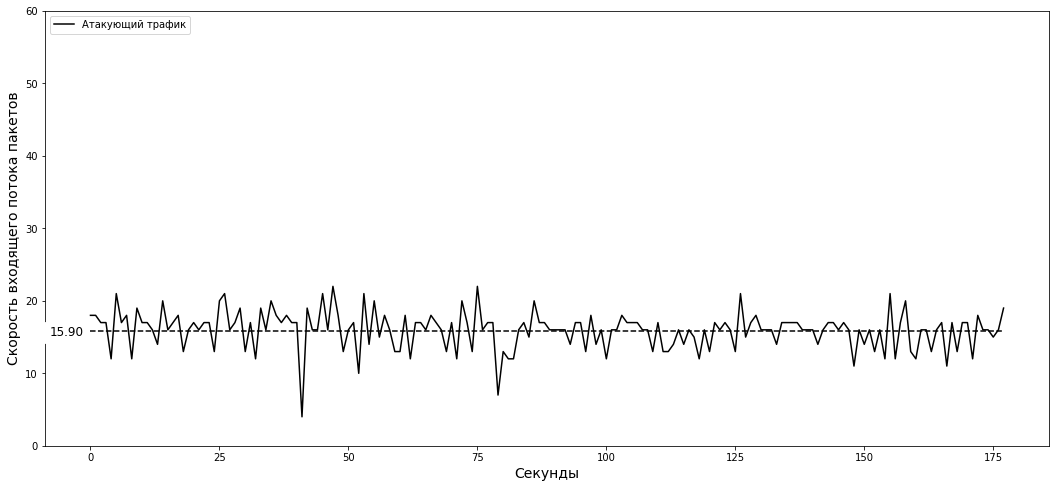

In [31]:
# 1 of 100 packets
def average(lst):
    summ = 0
    count = 0
    for i in lst:
        if i > 3:
            summ += i
            count += 1
    return summ/count


def std_deviation(lst):
    summ = 0
    count = 0
    aver = average(lst)
    for i in lst:
        if i > 3:
            summ += (i - aver) ** 2
            count += 1
    return (summ/count) ** 0.5 

with open('sflowdata_100.json','r') as file:
    st = file.read()
    #print(st[0:1000])
    time = []
    all_packets = []
    my_packets = []
    other_packets = []
    
    old_time, new_time = None, None
    
    while st != '':
        try:
            json.loads(st)
        except ValueError as err:
            err_st = err.args[0]
            sym = int(re.findall(r"\(char (.*)\)", err_st)[0])
            one_json = st[:sym-2]
            st = st[sym:]
            datagram = json.loads(one_json)

            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                else:
                    time_counter = 0
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
        else:
            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                time_counter += 1
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                #print(i['elements'][0])
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
            st = ''        
    
    time.append(time_counter)
    all_packets.append(all_counter)
    my_packets.append(my_counter)
    other_packets.append(all_counter - my_counter)
    
    #all_average = [average(all_packets) for _ in time]
    my_average = [average(my_packets) for _ in time]
    
    mp.figure(figsize=(18, 8)) #18 10
    font = {"size": 14}
    mp.ylim([0,60])
    mp.xlabel('Секунды', **font)
    mp.ylabel('Скорость входящего потока пакетов', **font)
    leftborder = 6
    rightborder = 1
    #mp.plot(time, all_packets, color = 'g')
    #mp.plot(time, my_packets, color = 'black')
    mp.plot(time[:-(leftborder+rightborder)], my_packets[leftborder:-rightborder], color = 'black')
    #mp.plot(time, other_packets, color = 'b')
    #mp.title('Incomming packets. Sampling: 1 of 100')
    mp.legend(['Атакующий трафик'], loc = 'upper left')
    #mp.legend([ 'All packets','DoS packets', 'Other packets'], loc = 'upper left')
    
    #mp.plot(time, all_average, '--', color = 'g')
    # mp.plot(time, my_average, '--', color = 'black')
    mp.plot(time[:-(leftborder+rightborder)], my_average[:-(leftborder+rightborder)], '--', color = 'black')
    #mp.text(-3, all_average[0]+0.4, "{:.2f}".format(all_average[0]), fontsize=12, bbox=dict(color='w'))
    mp.text(-8, my_average[0]-0.7, "{:.2f}".format(my_average[0]), fontsize=12, bbox=dict(color='w'))

    one_of_100 = my_packets
    one_of_100_average = my_average[0]
    
    std_dev_100 = std_deviation(my_packets)
    
    #print(result)

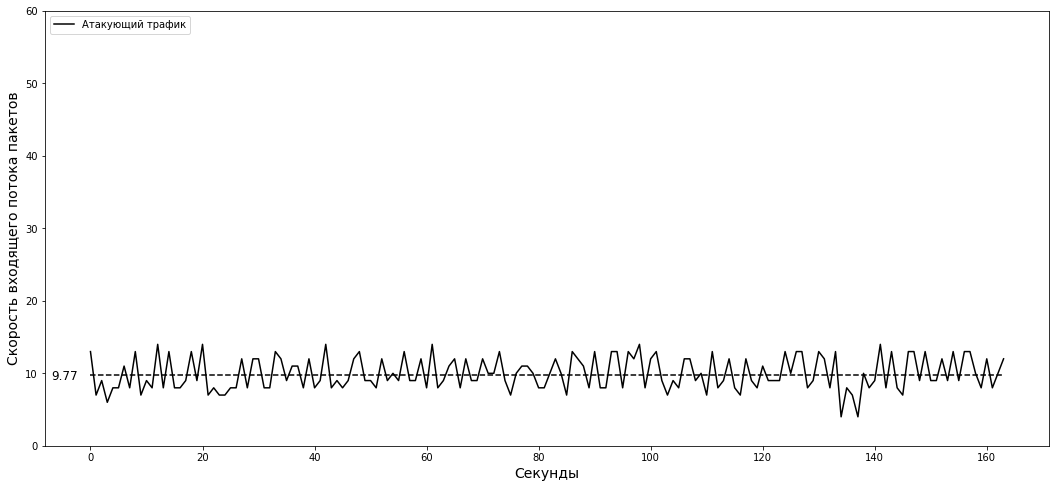

In [4]:
# 1 of 200 packets
def average(lst):
    summ = 0
    count = 0
    for i in lst:
        if i > 2:
            summ += i
            count += 1
    return summ/count


def std_deviation(lst):
    summ = 0
    count = 0
    aver = average(lst)
    for i in lst:
        if i > 2:
            summ += (i - aver) ** 2
            count += 1
    return (summ/count) ** 0.5 


with open('sflowdata_200.json','r') as file:
    st = file.read()
    #print(st[0:1000])
    time = []
    all_packets = []
    my_packets = []
    other_packets = []
    
    old_time, new_time = None, None
    
    while st != '':
        try:
            json.loads(st)
        except ValueError as err:
            err_st = err.args[0]
            sym = int(re.findall(r"\(char (.*)\)", err_st)[0])
            one_json = st[:sym-2]
            st = st[sym:]
            datagram = json.loads(one_json)

            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                else:
                    time_counter = 0
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
        else:
            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                time_counter += 1
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                #print(i['elements'][0])
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
            st = ''        
    
    time.append(time_counter)
    all_packets.append(all_counter)
    my_packets.append(my_counter)
    other_packets.append(all_counter - my_counter)
    
    all_average = [average(all_packets) for _ in time]
    my_average = [average(my_packets) for _ in time]
    
    mp.figure(figsize=(18, 8)) #18 10
    font = {"size": 14}
    mp.xlabel('Секунды', **font)
    mp.ylabel('Скорость входящего потока пакетов', **font)
    leftborder = 20
    rightborder = 6
    mp.ylim([0,60])
    #mp.plot(time[:-(leftborder+rightborder)], all_packets[leftborder:-rightborder], color = 'black')
    mp.plot(time[:-(leftborder+rightborder)], my_packets[leftborder:-rightborder], color = 'black')
    #mp.plot(time[:-(leftborder+rightborder)], other_packets[leftborder:-rightborder], color = 'black')
    #mp.title('Incomming packets. Sampling: 1 of 200')
    #mp.legend([ 'All packets','DoS packets', 'Other packets'], loc = 'upper left')
    
    #mp.legend([ 'Весь трафик','Атакующий трафик', 'Обычный трафик'], loc = 'upper left')
    mp.legend(['Атакующий трафик'], loc = 'upper left')
    #mp.plot(time[:-(leftborder+rightborder)], all_average[:-(leftborder+rightborder)], '--', color = 'black')
    mp.plot(time[:-(leftborder+rightborder)], my_average[:-(leftborder+rightborder)], '--', color = 'black')
    
    #mp.text(-7, all_average[0]+0.4, "{:.2f}".format(all_average[0]), fontsize=12, bbox=dict(color='w'))
    mp.text(-7, my_average[0]-0.7, "{:.2f}".format(my_average[0]), fontsize=12, bbox=dict(color='w'))

    one_of_200 = my_packets
    one_of_200_average = my_average[0]
    
    std_dev_200 = std_deviation(my_packets)
    #print(result)

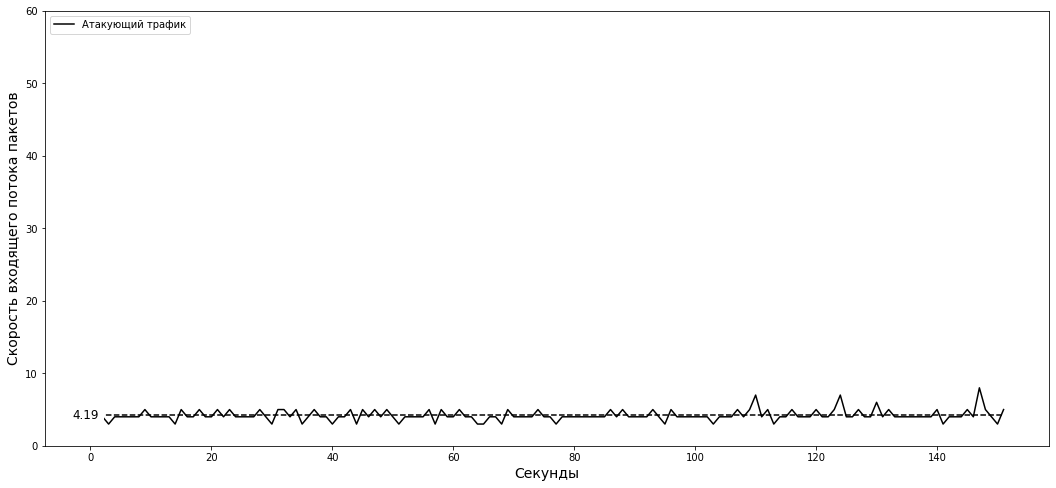

In [35]:
# 1 of 500 packets
def average(lst):
    summ = 0
    count = 0
    for i in lst:
        if i > 2:
            summ += i
            count += 1
    return summ/count


def std_deviation(lst):
    summ = 0
    count = 0
    aver = average(lst)
    for i in lst:
        if i > 2:
            summ += (i - aver) ** 2
            count += 1
    return (summ/count) ** 0.5 


with open('sflowdata_500.json','r') as file:
    st = file.read()
    #print(st[0:1000])
    time = []
    all_packets = []
    my_packets = []
    other_packets = []
    
    old_time, new_time = None, None
    
    while st != '':
        try:
            json.loads(st)
        except ValueError as err:
            err_st = err.args[0]
            sym = int(re.findall(r"\(char (.*)\)", err_st)[0])
            one_json = st[:sym-2]
            st = st[sym:]
            datagram = json.loads(one_json)

            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                else:
                    time_counter = 0
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
        else:
            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                time_counter += 1
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                #print(i['elements'][0])
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
            st = ''        
    
    time.append(time_counter)
    all_packets.append(all_counter)
    my_packets.append(my_counter)
    other_packets.append(all_counter - my_counter)
    
    all_average = [average(all_packets) for _ in time]
    my_average = [average(my_packets) for _ in time]
    
    mp.figure(figsize=(18, 8)) #18 10
    font = {"size": 14}
    mp.ylim([0,60])
    mp.xlabel('Секунды', **font)
    mp.ylabel('Скорость входящего потока пакетов', **font)
    leftborder = 6
    rightborder = 3
    mp.plot(time[:-(leftborder+rightborder)], my_packets[leftborder:-rightborder], color = 'black')
    mp.legend(['Атакующий трафик'], loc = 'upper left')
    #mp.figure(figsize=(18, 10))
    #mp.xlabel('Seconds')
    #mp.ylabel('Packets')
    #mp.plot(time, all_packets, color = 'g')
    #mp.plot(time, my_packets, color = 'r')
    #mp.plot(time, other_packets, color = 'b')
    #mp.title('Incomming packets. Sampling: 1 of 500')
    #mp.legend([ 'All packets','DoS packets', 'Other packets'], loc = 'upper left')
    
    #mp.plot(time, all_average, '--', color = 'g')
    #mp.plot(time, my_average, '--', color = 'black')
    mp.plot(time[:-(leftborder+rightborder)], my_average[:-(leftborder+rightborder)], '--', color = 'black')
    #mp.text(-3, all_average[0]+0.3, "{:.2f}".format(all_average[0]), fontsize=12, bbox=dict(color='w'))
    mp.text(-3, my_average[0]-0.4, "{:.2f}".format(my_average[0]), fontsize=12, bbox=dict(color='w'))

    one_of_500 = my_packets
    one_of_500_average = my_average[0]
    
    std_dev_500 = std_deviation(my_packets)

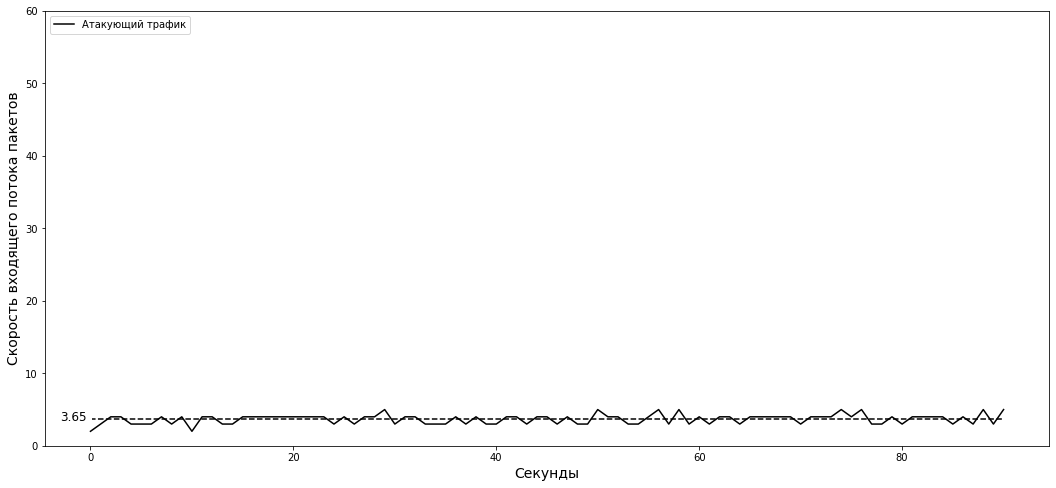

In [37]:
# 1 of 1000 packets
def average(lst):
    summ = 0
    count = 0
    for i in lst:
        if i > 1:
            summ += i
            count += 1
    return summ/count


def std_deviation(lst):
    summ = 0
    count = 0
    aver = average(lst)
    for i in lst:
        if i > 1:
            summ += (i - aver) ** 2
            count += 1
    return (summ/count) ** 0.5 


with open('sflowdata_1000.json','r') as file:
    st = file.read()
    #print(st[0:1000])
    time = []
    all_packets = []
    my_packets = []
    other_packets = []
    
    old_time, new_time = None, None
    
    while st != '':
        try:
            json.loads(st)
        except ValueError as err:
            err_st = err.args[0]
            sym = int(re.findall(r"\(char (.*)\)", err_st)[0])
            one_json = st[:sym-2]
            st = st[sym:]
            datagram = json.loads(one_json)

            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                else:
                    time_counter = 0
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
        else:
            old_time, new_time = new_time, datagram['localtime']
            if old_time != new_time:
                if old_time != None:
                    
                    time.append(time_counter)
                    all_packets.append(all_counter)
                    my_packets.append(my_counter)
                    other_packets.append(all_counter - my_counter)
                    
                    time_counter += 1
                time_counter += 1
                all_counter = 0
                my_counter = 0

            for i in datagram['samples']:
                #print(i['elements'][0])
                if i['sampleType'] == 'FLOWSAMPLE' and 'dstIP' in i['elements'][0].keys() and i['elements'][0]['dstIP'] == '91.222.128.200': 
                    all_counter += 1
                    if'srcIP' in i['elements'][0].keys() and i['elements'][0]['srcIP'] == "95.165.99.64":
                        my_counter += 1
            st = ''        
    
    time.append(time_counter)
    all_packets.append(all_counter)
    my_packets.append(my_counter)
    other_packets.append(all_counter - my_counter)
    
    all_average = [average(all_packets) for _ in time]
    my_average = [average(my_packets) for _ in time]
    
    mp.figure(figsize=(18, 8)) #18 10
    font = {"size": 14}
    mp.ylim([0,60])
    mp.xlabel('Секунды', **font)
    mp.ylabel('Скорость входящего потока пакетов', **font)
    leftborder = 8
    rightborder = 3
    mp.plot(time[:-(leftborder+rightborder)], my_packets[leftborder:-rightborder], color = 'black')
    mp.legend(['Атакующий трафик'], loc = 'upper left')
    mp.plot(time[:-(leftborder+rightborder)], my_average[:-(leftborder+rightborder)], '--', color = 'black')
    
    #mp.figure(figsize=(18, 10))
    #mp.xlabel('Seconds')
    #mp.ylabel('Packets')
    #mp.plot(time, all_packets, color = 'g')
    #mp.plot(time, my_packets, color = 'r')
    #mp.plot(time, other_packets, color = 'b')
    #mp.title('Incomming packets. Sampling: 1 of 1000')
    #mp.legend([ 'All packets','DoS packets', 'Other packets'], loc = 'upper left')
    
    #mp.plot(time, all_average, '--', color = 'g')
    #mp.plot(time, my_average, '--', color = 'r')
    #mp.text(-3, all_average[0]+0.1, "{:.2f}".format(all_average[0]), fontsize=12, bbox=dict(color='w'))
    mp.text(-3, my_average[0]-0.2, "{:.2f}".format(my_average[0]), fontsize=12, bbox=dict(color='w'))

    one_of_1000 = my_packets
    one_of_1000_average = my_average[0]
    
    std_dev_1000 = std_deviation(my_packets)

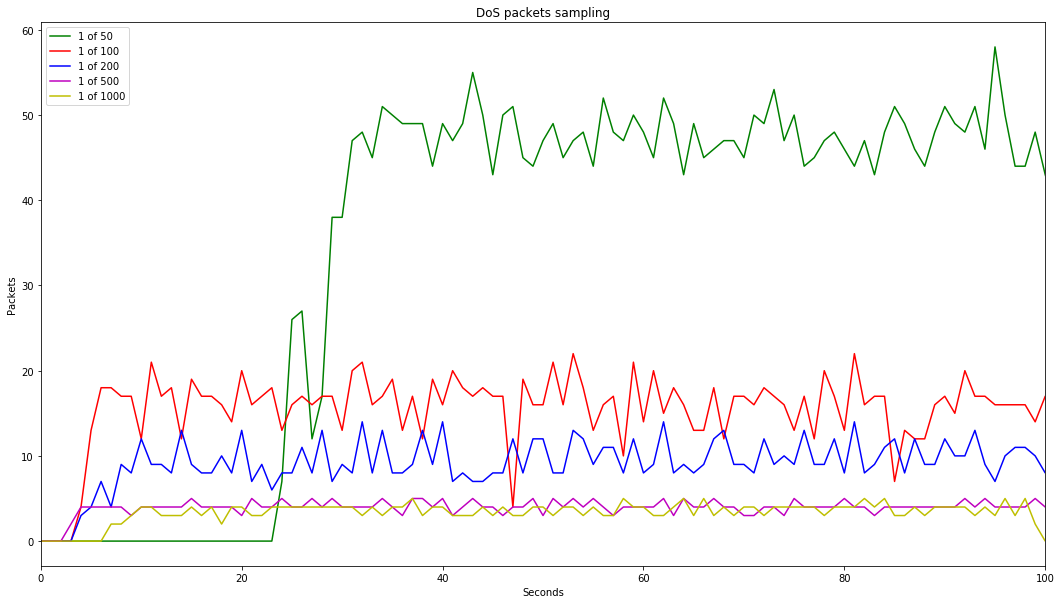

In [7]:
mp.figure(figsize=(18, 10))
mp.xlabel('Seconds')
mp.ylabel('Packets')
mp.xlim(0, 100)
mp.plot(one_of_50, color = 'g')
mp.plot(one_of_100, color = 'r')
mp.plot(one_of_200, color = 'b')
mp.plot(one_of_500, color = 'm')
mp.plot(one_of_1000, color = 'y')
mp.title('DoS packets sampling')
mp.legend([ '1 of 50','1 of 100', '1 of 200', '1 of 500', '1 of 1000'], loc = 'upper left')

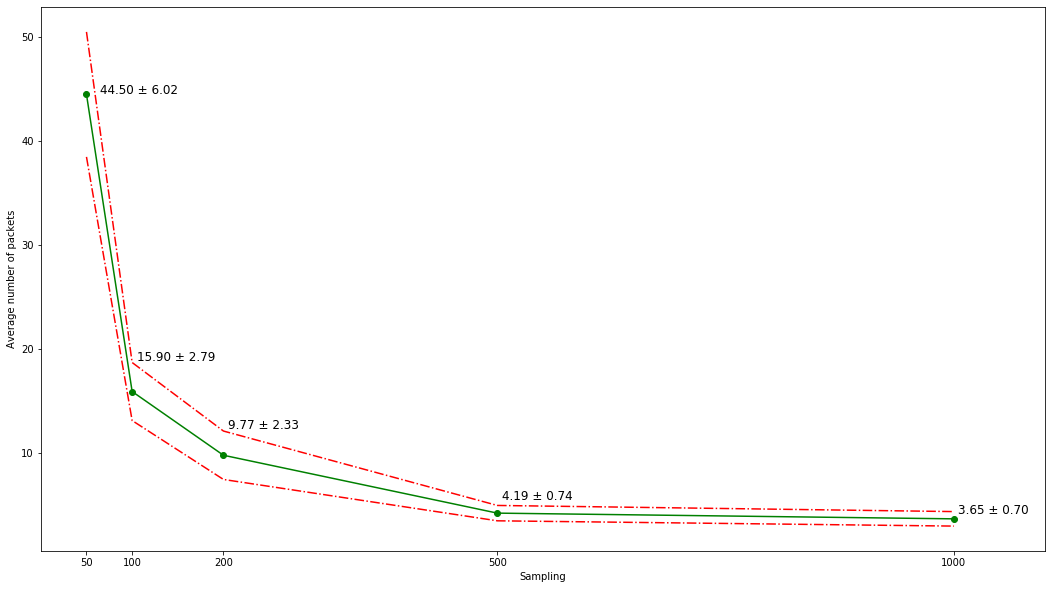

In [8]:
mp.figure(figsize=(18, 10))
mp.xlim(0,1100)
mp.xlabel('Sampling')
mp.ylabel('Average number of packets')
mp.plot([50, 100, 200, 500, 1000],\
        [one_of_50_average,\
         one_of_100_average,\
         one_of_200_average,\
         one_of_500_average,\
         one_of_1000_average],\
        marker='o', color = 'g')
mp.plot([50, 100, 200, 500, 1000],\
        [one_of_50_average + std_dev_50,\
         one_of_100_average + std_dev_100,\
         one_of_200_average + std_dev_200,\
         one_of_500_average + std_dev_500,\
         one_of_1000_average + std_dev_1000],\
        '-.', color = 'r')
mp.plot([50, 100, 200, 500, 1000],\
        [one_of_50_average - std_dev_50,\
         one_of_100_average - std_dev_100,\
         one_of_200_average - std_dev_200,\
         one_of_500_average - std_dev_500,\
         one_of_1000_average - std_dev_1000],\
        '-.', color = 'r')

mp.text(65, one_of_50_average, "{:.2f} \u00B1 {:.2f}".format(one_of_50_average, std_dev_50), fontsize=12)
mp.text(105, one_of_100_average+2.9, "{:.2f} \u00B1 {:.2f}".format(one_of_100_average, std_dev_100), fontsize=12)
mp.text(205, one_of_200_average+2.5, "{:.2f} \u00B1 {:.2f}".format(one_of_200_average, std_dev_200), fontsize=12)
mp.text(505, one_of_500_average+1.3, "{:.2f} \u00B1 {:.2f}".format(one_of_500_average, std_dev_500), fontsize=12)
mp.text(1005, one_of_1000_average+0.5, "{:.2f} \u00B1 {:.2f}".format(one_of_1000_average, std_dev_1000), fontsize=12)
mp.xticks(ticks=[50, 100, 200, 500, 1000], labels = ['50', '100', '200', '500', '1000'])


pass

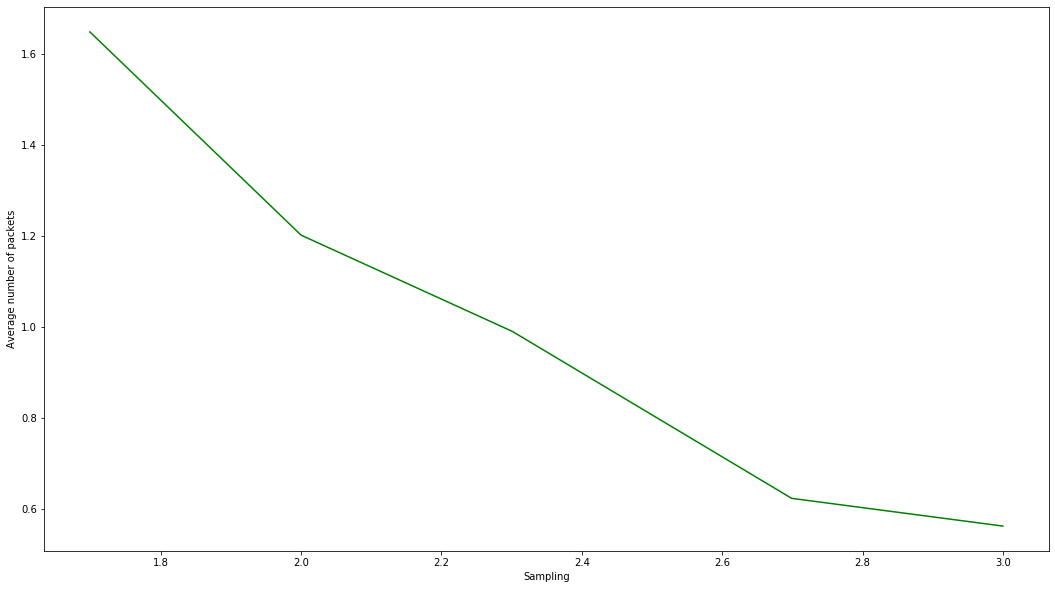

In [9]:
import math
mp.figure(figsize=(18, 10))
mp.xlabel('Sampling')
mp.ylabel('Average number of packets')
mp.plot([math.log10(50), math.log10(100), math.log10(200), math.log10(500), math.log10(1000)],[math.log10(one_of_50_average), math.log10(one_of_100_average), math.log10(one_of_200_average), math.log10(one_of_500_average), math.log10(one_of_1000_average)], color = 'g')

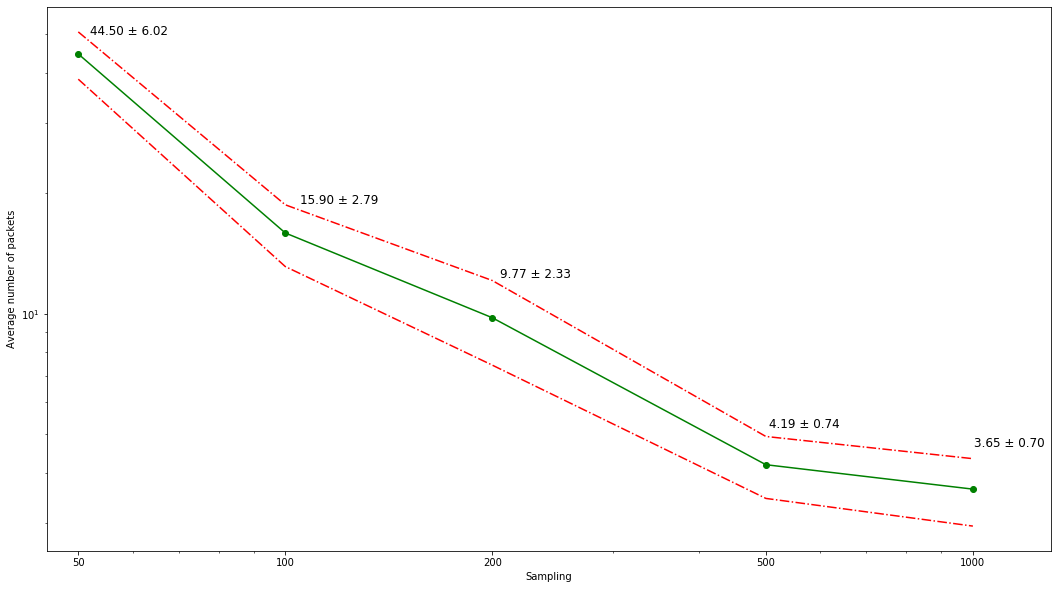

In [10]:
mp.figure(figsize=(18, 10))
mp.xlim(45, 1300)
mp.xlabel('Sampling')
mp.ylabel('Average number of packets')
mp.plot([50, 100, 200, 500, 1000],\
        [one_of_50_average,\
         one_of_100_average,\
         one_of_200_average,\
         one_of_500_average,\
         one_of_1000_average],\
        color = 'g', marker = 'o')
mp.plot([50, 100, 200, 500, 1000],\
        [one_of_50_average + std_dev_50,\
         one_of_100_average + std_dev_100,\
         one_of_200_average + std_dev_200,\
         one_of_500_average + std_dev_500,\
         one_of_1000_average + std_dev_1000],\
        '-.', color = 'r')
mp.plot([50, 100, 200, 500, 1000],\
        [one_of_50_average - std_dev_50,\
         one_of_100_average - std_dev_100,\
         one_of_200_average - std_dev_200,\
         one_of_500_average - std_dev_500,\
         one_of_1000_average - std_dev_1000],\
        '-.', color = 'r')
mp.xscale('log')
mp.yscale('log')

mp.text(52, one_of_50_average+5, "{:.2f} \u00B1 {:.2f}".format(one_of_50_average, std_dev_50), fontsize=12)
mp.text(105, one_of_100_average+2.9, "{:.2f} \u00B1 {:.2f}".format(one_of_100_average, std_dev_100), fontsize=12)
mp.text(205, one_of_200_average+2.5, "{:.2f} \u00B1 {:.2f}".format(one_of_200_average, std_dev_200), fontsize=12)
mp.text(505, one_of_500_average+1, "{:.2f} \u00B1 {:.2f}".format(one_of_500_average, std_dev_500), fontsize=12)
mp.text(1005, one_of_1000_average+1, "{:.2f} \u00B1 {:.2f}".format(one_of_1000_average, std_dev_1000), fontsize=12)

mp.xticks(ticks=[50, 100, 200, 500, 1000], labels = ['50', '100', '200', '500', '1000'])
'''
tmp = list(map(str, [one_of_50_average,\
                     one_of_100_average,\
                     one_of_200_average,\
                     one_of_500_average,\
                     one_of_1000_average])
          )
'''
tmp = list(map('{:.2f}'.format, [one_of_50_average,\
                     one_of_100_average,\
                     one_of_200_average,\
                     one_of_500_average,\
                     one_of_1000_average])
          )
'''
mp.yticks(ticks=
          [one_of_50_average,\
           one_of_100_average,\
           one_of_200_average,\
           one_of_500_average,\
           one_of_1000_average], 
          labels = tmp  
         )
'''
pass

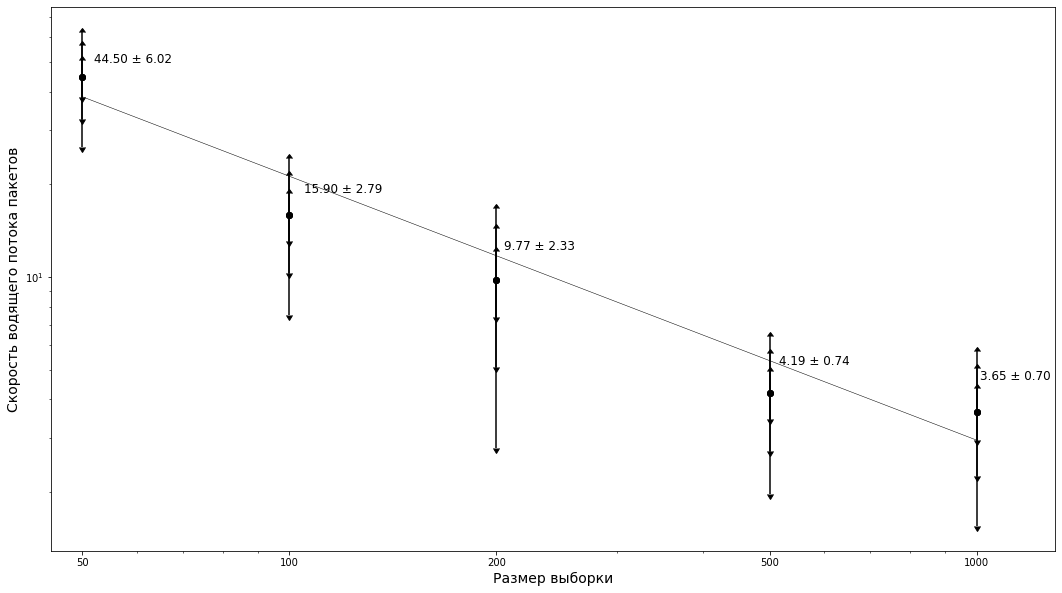

In [11]:
mp.figure(figsize=(18, 10))
mp.xlim(45, 1300)
font = {"size": 14}
mp.xlabel('Размер выборки', **font)
mp.ylabel('Скорость водящего потока пакетов', **font)
mp.errorbar([50, 100, 200, 500, 1000],\
        [one_of_50_average,\
         one_of_100_average,\
         one_of_200_average,\
         one_of_500_average,\
         one_of_1000_average],\
        [3*std_dev_50,\
         3*std_dev_100,\
         3*std_dev_200,\
         3*std_dev_500,\
         3*std_dev_1000],\
         color = 'black', marker = 'o', ecolor='black', lolims= True, uplims= True, linestyle='None')

mp.errorbar([50, 100, 200, 500, 1000],\
        [one_of_50_average,\
         one_of_100_average,\
         one_of_200_average,\
         one_of_500_average,\
         one_of_1000_average],\
        [2*std_dev_50,\
         2*std_dev_100,\
         2*std_dev_200,\
         2*std_dev_500,\
         2*std_dev_1000],\
         color = 'black', marker = 'o', ecolor='black', lolims= True, uplims= True, linestyle='None')

mp.errorbar([50, 100, 200, 500, 1000],\
        [one_of_50_average,\
         one_of_100_average,\
         one_of_200_average,\
         one_of_500_average,\
         one_of_1000_average],\
        [std_dev_50,\
         std_dev_100,\
         std_dev_200,\
         std_dev_500,\
         std_dev_1000],\
         color = 'black', marker = 'o', ecolor='black', lolims= True, uplims= True, linestyle='None')

mp.plot([50, 1000], [one_of_50_average - std_dev_50, one_of_1000_average - std_dev_1000], linewidth = 0.5, color = 'black')


mp.xscale('log')
mp.yscale('log')

mp.text(52, one_of_50_average+5, "{:.2f} \u00B1 {:.2f}".format(one_of_50_average, std_dev_50), fontsize=12)
mp.text(105, one_of_100_average+2.9, "{:.2f} \u00B1 {:.2f}".format(one_of_100_average, std_dev_100), fontsize=12)
mp.text(205, one_of_200_average+2.5, "{:.2f} \u00B1 {:.2f}".format(one_of_200_average, std_dev_200), fontsize=12)
mp.text(515, one_of_500_average+1, "{:.2f} \u00B1 {:.2f}".format(one_of_500_average, std_dev_500), fontsize=12)
mp.text(1010, one_of_1000_average+1, "{:.2f} \u00B1 {:.2f}".format(one_of_1000_average, std_dev_1000), fontsize=12)

mp.xticks(ticks=[50, 100, 200, 500, 1000], labels = ['50', '100', '200', '500', '1000'])

tmp = list(map('{:.2f}'.format, [one_of_50_average,\
                     one_of_100_average,\
                     one_of_200_average,\
                     one_of_500_average,\
                     one_of_1000_average])
          )
pass